<a href="https://colab.research.google.com/github/Harshi07-c/SPOTIFY-LIKE-OR-DISLIKE/blob/main/MODEL(TRAINED).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report


#LOADING THE CLEAN DATA

In [3]:
df = pd.read_csv("/content/cleaned_data.csv")
df.head(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,speechiness,tempo,valence,target,artist
0,0.01020,0.833,204600,0.434,0.021900,-8.795,0.4310,150.062,0.286,1,0.562251
1,0.19900,0.743,326933,0.359,0.006110,-10.401,0.0794,160.083,0.588,1,0.575818
2,0.03440,0.838,185707,0.412,0.000234,-7.148,0.2890,75.044,0.173,1,0.562251
3,0.60400,0.494,199413,0.338,0.510000,-15.236,0.0261,86.468,0.230,1,0.603482
4,0.18000,0.678,392893,0.561,0.512000,-11.648,0.0694,174.004,0.904,1,0.570014
5,0.00479,0.804,251333,0.560,0.000000,-6.682,0.1850,85.023,0.264,1,0.628824
6,0.01450,0.739,241400,0.472,0.000007,-11.204,0.1560,80.030,0.308,1,0.628824
7,0.02020,0.266,349667,0.348,0.664000,-11.609,0.0371,144.154,0.393,1,0.570014
8,0.04810,0.603,202853,0.944,0.000000,-3.626,0.3470,130.035,0.398,1,0.570014
9,0.00208,0.836,226840,0.603,0.000000,-7.792,0.2370,99.994,0.386,1,0.570014


#Check Class Imbalance/Balance On The Dataset

In [ ]:
df['target'].value_counts()


1    1020
0     997
Name: target, dtype: int64

# Standardization

In [4]:
y = df['target']
X = df.drop('target', axis=1)
numeric_col = X.select_dtypes(include='number').columns

In [5]:
#Created a function to standardize all numeric columns in a dataframe
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df



In [6]:
#Passing the dataframe and the numeric colums as parameters to the standardization function which standardizes all numeric values in a dataframe
df_standardized = standardization(X,numeric_col)

In [7]:
df_standardized.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,speechiness,tempo,valence,artist
0,-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.454530,3.763084,1.066709,-0.853039,0.742346
1,0.043897,0.773830,0.983716,-1.534468,-0.465683,-0.881573,-0.147529,1.442323,0.368970,0.923398
2,-0.589363,1.363932,-0.739362,-1.282352,-0.487200,-0.016586,2.183712,-1.745166,-1.310280,0.742346
3,1.602040,-0.772860,-0.572137,-1.634363,1.379429,-2.167220,-0.740350,-1.316964,-1.079636,1.292550
4,-0.029201,0.370075,1.788484,-0.573574,1.386753,-1.213155,-0.258753,1.964120,1.647627,0.845943


#USING TRAINED MODEL

 Here we will evaluate the performance of the trained model on the provided test data.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
#Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


LOGISTIC REGRESSION

In [10]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

Confusion Matrix:
[[200   3]
 [  4 197]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       203
           1       0.98      0.98      0.98       201

    accuracy                           0.98       404
   macro avg       0.98      0.98      0.98       404
weighted avg       0.98      0.98      0.98       404



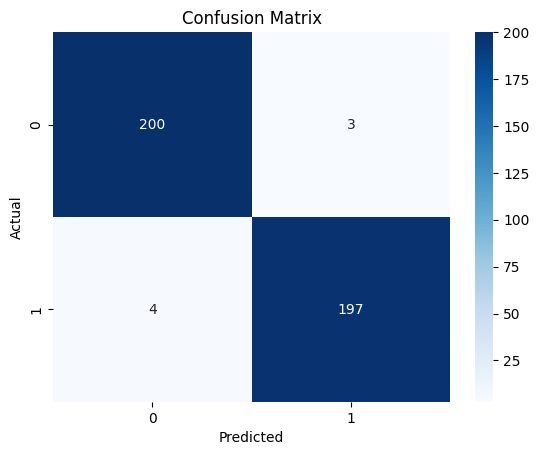

In [11]:

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate classification report (precision, recall, F1-score)
report = classification_report(y_test, y_pred)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

DECISION TREES

In [12]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

Confusion Matrix:
[[200   3]
 [  1 200]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       203
           1       0.99      1.00      0.99       201

    accuracy                           0.99       404
   macro avg       0.99      0.99      0.99       404
weighted avg       0.99      0.99      0.99       404



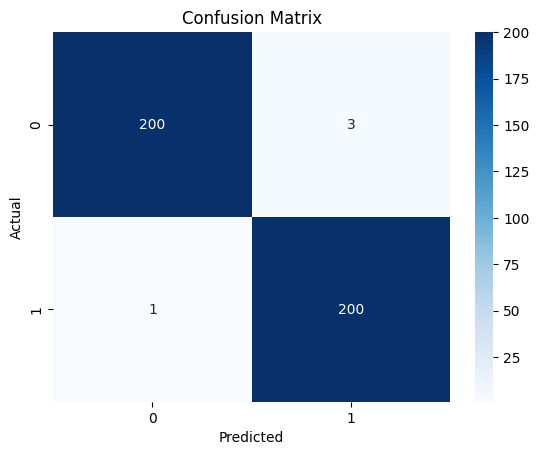

In [13]:
# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate classification report (precision, recall, F1-score)
report = classification_report(y_test, y_pred)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

RANDOM FOREST

In [14]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)



RandomForestClassifier()

Confusion Matrix:
[[199   4]
 [  2 199]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       203
           1       0.98      0.99      0.99       201

    accuracy                           0.99       404
   macro avg       0.99      0.99      0.99       404
weighted avg       0.99      0.99      0.99       404



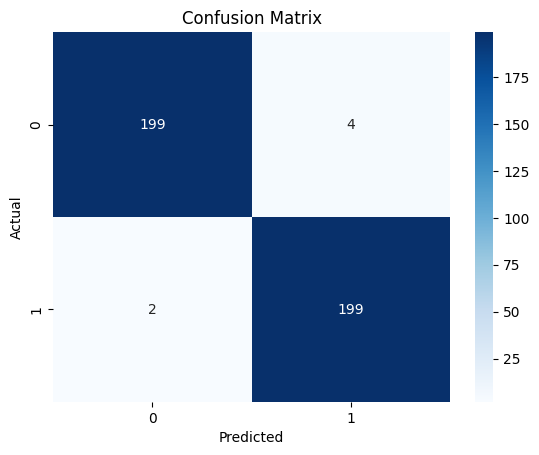

In [15]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate classification report (precision, recall, F1-score)
report = classification_report(y_test, y_pred)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#COMPARING THE PERFORMANCE OF ALL THE MODELS

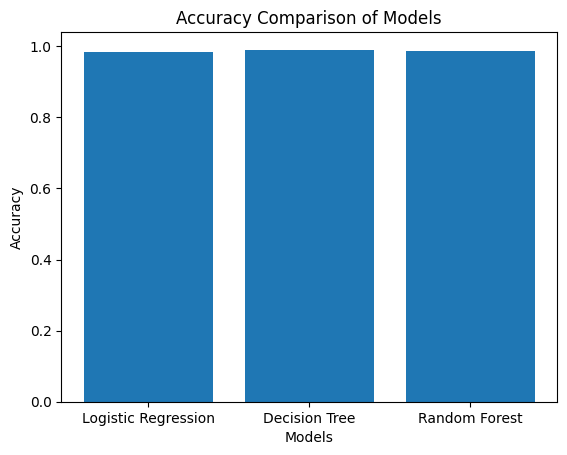

In [16]:
# Evaluate the models on the test set
lr_acc = accuracy_score(y_test, lr.predict(X_test))
dt_acc = accuracy_score(y_test, dt.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))

# Create a bar plot
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [lr_acc, dt_acc, rf_acc]

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.show()

INSIGHTS:

Frome the bar graph obtained, it can be said that the models almost have the same accuracy.